**Import necessary python libraries**

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils  
import numpy as np 

print("Libraries are imported successfully")
print("Tensorflow version: ",tf.__version__)


Libraries are imported successfully
Tensorflow version:  1.13.1


Download and load MNIT dataset

In [5]:
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data() 

  
# Translation of data  
# Reshape to 60000 x (28 x 28 x1)
X_Train_keras = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test_keras = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')  

11493376/11490434 [==============================] - 1s 0us/step


Features standardization and One-hot encoding



In [6]:
# Standardize feature data  
X_Train_keras_norm = X_Train_keras / 255  
X_Test_keras_norm = X_Test_keras /255  
      
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)



Create a convolutional neural network


In [8]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
      
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                     kernel_size=(5,5),  
                     padding='same',  
                     input_shape=(28,28,1),  
                     activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                  kernel_size=(5,5),  
                  padding='same',  
                  input_shape=(28,28,1),  
                  activation='relu'))  
      
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Add Dropout layer  
model.add(Dropout(0.25))  


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Create two fully connected layer

In [9]:
model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
#Prevent overfitting
model.add(Dropout(0.5))  

#Ouput N-class probabilities
model.add(Dense(10, activation='softmax'))


model.summary()  
print("")  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               225920    
__________

Start to train the CNN

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  

train_history = model.fit(x=X_Train_keras_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 51s - loss: 0.4984 - acc: 0.8429 - val_loss: 0.0979 - val_acc: 0.9717
Epoch 2/10
 - 26s - loss: 0.1428 - acc: 0.9575 - val_loss: 0.0663 - val_acc: 0.9812
Epoch 3/10
 - 25s - loss: 0.1009 - acc: 0.9692 - val_loss: 0.0534 - val_acc: 0.9833
Epoch 4/10
 - 25s - loss: 0.0826 - acc: 0.9753 - val_loss: 0.0474 - val_acc: 0.9860
Epoch 5/10
 - 25s - loss: 0.0702 - acc: 0.9793 - val_loss: 0.0416 - val_acc: 0.9881
Epoch 6/10
 - 25s - loss: 0.0636 - acc: 0.9809 - val_loss: 0.0381 - val_acc: 0.9885
Epoch 7/10
 - 26s - loss: 0.0558 - acc: 0.9833 - val_loss: 0.0373 - val_acc: 0.9892
Epoch 8/10
 - 26s - loss: 0.0499 - acc: 0.9851 - val_loss: 0.0335 - val_acc: 0.9902
Epoch 9/10
 - 25s - loss: 0.0424 - acc: 0.9865 - val_loss: 0.0334 - val_acc: 0.9913
Epoch 10/10
 - 26s - loss: 0.0411 - acc: 0.9874 - val_loss: 0.0326 - val_acc: 0.9912


Display Training History

In [11]:
import os  
      
      
import matplotlib.pyplot as plt  
def plot_image(image): 
    #get current figure 
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
      
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
      
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  


  Using cached https://files.pythonhosted.org/packages/55/e6/c2d2b2703e7debc8b501caae0e6f7ead148fd0faa3c8131292a599930029/utils-1.0.1-py2.py3-none-any.whl


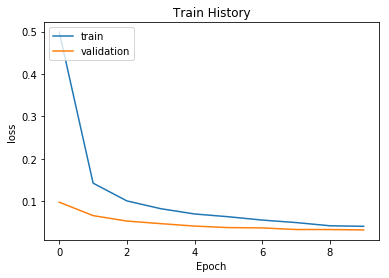

In [14]:
!pip3 install utils
from utils import *  

show_train_history(train_history, 'loss', 'val_loss')  

Test CNN

In [15]:
scores = model.evaluate(X_Test_keras_norm, y_TestOneHot)  
print()  
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 8s 772us/sample - loss: 0.0237 - acc: 0.9919

[Info] Accuracy of testing data = 99.2%


[Info] Making prediction of X_Test4D_norm

[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



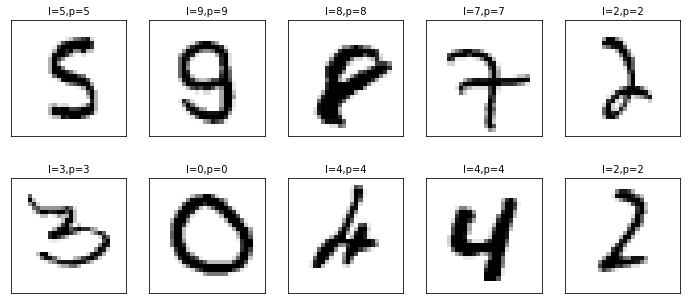

In [16]:
print("[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test_keras_norm)  # Making prediction and save result to prediction  
print()  
print("[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  

plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)  